# Task 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1.1
#Creates a dataframe and displays it
cli_data = pd.read_csv('METOffice.csv')
cli_data

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth
...,...,...,...,...,...,...,...,...
37054,2020.0,2.0,10.8,4.5,2.0,117.4,63.1,yeovilton
37055,2020.0,3.0,11.5,3.0,6.0,43.4,159.2,yeovilton
37056,2020.0,4.0,17.5,5.3,3.0,39.8,235.0,yeovilton
37057,2020.0,5.0,19.7,6.8,2.0,3.6,305.6,yeovilton


In [3]:
#1.2
#Identify the index of the row where rain is at a max
max_rain_index = cli_data['rain'].idxmax()

#Using index, create a variable for year and place where max rain occured
year = int(cli_data.at[max_rain_index, 'year'])
place = cli_data.at[max_rain_index, 'station']

print('Maximum rainfall occured in', year, 'at', place)

Maximum rainfall occured in 2015 at eskdalemuir


In [4]:
#1.3

#Assign first 10 values of cli_data, sorted by rainfall descending, to a new dataframe
max_rainfall = cli_data.sort_values('rain', ascending = False).head(10)

max_rainfall.rename(columns = {'rain':'rainfall'}, inplace = True)

max_rainfall.drop(columns = ['tmin', 'af', 'sun'], inplace = True)

max_rainfall

,year,month,tmax,rainfall,station
13182,2015.0,12.0,8.6,568.8,eskdalemuir
13109,2009.0,11.0,8.2,431.6,eskdalemuir
8891,2009.0,11.0,9.4,425.4,cwmystwyth
8783,2000.0,11.0,8.2,424.4,cwmystwyth
8376,1966.0,12.0,7.5,419.8,cwmystwyth
13232,2020.0,2.0,6.0,418.0,eskdalemuir
9396,2011.0,12.0,8.1,417.8,dunstaffnage
8364,1965.0,12.0,7.0,417.3,cwmystwyth
12956,1997.0,2.0,6.7,401.6,eskdalemuir
8798,2002.0,2.0,8.6,401.3,cwmystwyth


# Task 2

In [5]:
#2.1
#Create a dataframe consisting of rows where month has no value
mo_NaN = cli_data[cli_data['month'].isnull()].drop(columns = {'sun', 'tmin', 'af'})
#Remove Rows from dataframe where month =NaN
cli_data.dropna(subset = 'month', inplace = True)
#Display rows where month is NaN
mo_NaN

,year,month,tmax,rain,station
3540,NaN,NaN,NaN,NaN,ballypatrick
5023,NaN,NaN,NaN,NaN,braemar
8908,NaN,NaN,NaN,NaN,cwmystwyth
9366,NaN,NaN,NaN,NaN,dunstaffnage
16706,NaN,NaN,NaN,NaN,lowestoft
17820,NaN,NaN,NaN,NaN,lowestoft
18745,NaN,NaN,NaN,NaN,manston
18923,NaN,NaN,NaN,NaN,nairn
19734,NaN,NaN,NaN,NaN,nairn
24201,NaN,NaN,NaN,NaN,ringway


In [6]:
#2.2
#Create a dataframe of duplicates
duplicates = cli_data[cli_data.duplicated(subset = ('year','month','station'), keep = 'last')].drop(columns = {'sun', 'tmax', 'tmin', 'af'})
duplicates

,year,month,rain,station
22036,1961.0,4.0,75.9,oxford
22037,1961.0,4.0,75.9,oxford
22038,1961.0,4.0,75.9,oxford
22039,1961.0,4.0,75.9,oxford
22040,1961.0,4.0,75.9,oxford
22041,1961.0,4.0,75.9,oxford
22042,1961.0,4.0,75.9,oxford
22043,1961.0,4.0,75.9,oxford
22044,1961.0,4.0,75.9,oxford
22045,1961.0,4.0,75.9,oxford


In [7]:
#remove duplicates from Cli_data, keeping one copy
cli_data.drop_duplicates(subset = ('year','month','station'), inplace = True)

In [8]:
#2.3
#Apply a function to sun column that marks any string values as true 
#Assign the columns marked true to a new dataframe
strings = cli_data[cli_data['sun'].apply(lambda x: isinstance(x,str))]
strings
#Note an empty Dataframe means no strings are present

,year,month,tmax,tmin,af,rain,sun,station


In [9]:
#Remove strings from sun column
cli_data['sun'] = pd.to_numeric(cli_data['sun'], downcast = 'float')

In [10]:
#2.4
#Find rows where rainfall is negative
negatives = cli_data.loc[cli_data['rain'] < 0].drop(columns = {'sun', 'tmin', 'af'})

negatives
#Note that an empty dataframe means no negative values are present

,year,month,tmax,rain,station


In [11]:
def abs_value (x):
    #Return the absolute value of x if it is less than 0
    if x<0:
        return abs(x)
    else:
        return x
#Change sign of rainfaill where rainfall is negative
cli_data['sun'] = cli_data['sun'].apply(abs_value)

In [12]:
#2.5
#Create a dataframe each for 6 locations
whitby = cli_data.loc[cli_data['station'] == 'whitby', ['year','month','tmax','rain','station']].reset_index()
oxford = cli_data.loc[cli_data['station'] == 'oxford', ['year','month','tmax','rain','station']].reset_index()
heathrow = cli_data.loc[cli_data['station'] == 'heathrow', ['year','month','tmax','rain','station']].reset_index()
bradford = cli_data.loc[cli_data['station'] == 'bradford', ['year','month','tmax','rain','station']].reset_index()
manston = cli_data.loc[cli_data['station'] == 'manston', ['year','month','tmax','rain','station']].reset_index()
wickairport = cli_data.loc[cli_data['station'] == 'wickairport', ['year','month','tmax','rain','station']].reset_index()

2.6

In this scenario, it would not be appropriate to use bfill or ffill to replace missing values for rainfall. Since the values for rainfaill varies significantly month to month, the use of a filling method can create inaccuracies in our data. In cases where there are many missing values, this could lead to flawed data, and as a result, inaccurate conclusions. As such, it is better to avoid using a fill method in this scenario.


# Task 3

In [13]:
#3.1
#Create variables for summary statistics of rainfall at each station
summary_oxford = oxford['rain'].describe()
summary_whitby = whitby['rain'].describe()
summary_heathrow = heathrow['rain'].describe()
summary_bradford = bradford['rain'].describe()
summary_manston = manston['rain'].describe()
summary_wickairport = wickairport['rain'].describe()
print('Oxford', '\n', summary_oxford, '\nWhitby\n', summary_whitby, '\nHeathrow\n', summary_heathrow, '\nBradford\n', summary_bradford, '\nManston\n', summary_manston, '\nWickairport\n', summary_wickairport)

Oxford 
 count    1983.000000
mean       54.826525
std        31.304781
min         0.500000
25%        31.650000
50%        49.800000
75%        74.800000
max       192.900000
Name: rain, dtype: float64 
Whitby
 count    693.000000
mean      49.432900
std       29.214436
min        2.300000
25%       28.500000
50%       44.300000
75%       64.900000
max      189.000000
Name: rain, dtype: float64 
Heathrow
 count    870.000000
mean      50.456092
std       29.708489
min        0.300000
25%       27.850000
50%       46.650000
75%       68.800000
max      174.800000
Name: rain, dtype: float64 
Bradford
 count    1310.000000
mean       72.784351
std        41.118986
min         1.300000
25%        41.825000
50%        66.700000
75%        96.675000
max       266.800000
Name: rain, dtype: float64 
Manston
 count    923.000000
mean      49.198808
std       31.783676
min        0.400000
25%       26.900000
50%       43.700000
75%       64.400000
max      271.800000
Name: rain, dtype: float64

In [14]:
#3.2
#Create a list of cities to be used for iteration
cities =['Oxford', 'Whitby', 'Heathrow', 'Bradford', 'Wickairport', 'Manston']
#Create a dictionary, with keys of the cities, and the values being to corresponding dataframe
citystats = {'Oxford': oxford, 'Whitby': whitby, 'Heathrow': heathrow, 'Bradford':bradford, 'Wickairport':wickairport, 'Manston': manston}


In [15]:
def sumcities (dictionary):
    #Create an empty dataframe
    df = pd.DataFrame()
    for city in cities:
        #Create desired variables
        location = city
        #Create a version of the dataframe without NaN values to get accurate measurements of count/start/end
        noNA = citystats[city].dropna(subset = 'rain',)
        mean = citystats[city]['rain'].mean()
        median = citystats[city]['rain'].median()
        #Number of days where rainfall was recorded 
        #(note: Assumes for each month, a measurement was taken every day)
        count = (len(noNA) * 365/12) // 1
        #Looks at first and last NaN entries to see date of first/last measurement
        start = noNA['year'].iat[0]
        end = noNA['year'].iat[-1]
        #append to df summary stats
        city_row = pd.DataFrame({'Location': location, 'Mean Rainfall': mean, 'Median Rainfall': median, 'Days Measured': count,'Start Year': start, 'End Year':end}, index= [0])
        df = pd.concat([df, city_row], ignore_index = True)
    return df
sumcitiesdf = sumcities(citystats)
sumcitiesdf

,Location,Mean Rainfall,Median Rainfall,Days Measured,Start Year,End Year
0,Oxford,54.826525,49.80,60316.0,1853.0,2020.0
1,Whitby,49.432900,44.30,21078.0,1961.0,2020.0
2,Heathrow,50.456092,46.65,26462.0,1948.0,2020.0
3,Bradford,72.784351,66.70,39845.0,1911.0,2020.0
4,Wickairport,65.076990,61.90,38598.0,1914.0,2020.0
5,Manston,49.198808,43.70,28074.0,1934.0,2020.0


In [16]:
#3.3
def year2dec (years):
    #Take the inputted year and apply floor division, removing the ones digit
    #Then multiply by ten to add a 0 in the ones digit to display the decade
    #Return the value as an int to remove decimal places
    return int(years// 10 * 10)
for city in cities:
    citystats[city]['decade'] = citystats[city]['year'].apply(year2dec)

In [17]:
#3.4
#Create an empty dataframe
bigtemps = pd.DataFrame()
for city in cities:
    #add every instance where tmax>20 to df
    bigtemps = pd.concat([bigtemps, citystats[city].loc[citystats[city]['tmax'] > 20]])
#Create individual dataframes based on station
largeox = bigtemps.loc[bigtemps['station'] == 'oxford'].reset_index()
largewhit = bigtemps.loc[bigtemps['station'] == 'whitby'].reset_index()
largeman = bigtemps.loc[bigtemps['station'] == 'manston'].reset_index()
largeheath = bigtemps.loc[bigtemps['station'] == 'heathrow'].reset_index()
largebrad = bigtemps.loc[bigtemps['station'] == 'bradford'].reset_index()
largewick = bigtemps.loc[bigtemps['station'] == 'wickairport'].reset_index()

#DMT: Decade mean temperature
#Group the dataframes of results where tmax>20 by decade and take the mean
DMTO = largeox.groupby('decade')['tmax'].mean()
oxcount = largeox.groupby('decade').size()
DMTWh = largewhit.groupby('decade')['tmax'].mean()
whcount = largewhit.groupby('decade').size()
DMTM = largeman.groupby('decade')['tmax'].mean()
macount = largeman.groupby('decade').size()
DMTH = largeheath.groupby('decade')['tmax'].mean()
hecount = largeheath.groupby('decade').size()
DMTB = largebrad.groupby('decade')['tmax'].mean()
brcount = largebrad.groupby('decade').size()
DMTWi = largewick.groupby('decade')['tmax'].mean()
wicount = largewick.groupby('decade').size()
print('Oxford', '\n', DMTO, '\nWhitby\n', DMTWh, '\nHeathrow\n', DMTH, '\nBradford\n', DMTB, '\nManston\n', DMTM, '\nWickairport\n', DMTWi)


Oxford 
 decade
1850    21.705000
1860    22.100000
1870    22.008000
1880    21.975000
1890    21.795238
1900    21.725000
1910    21.547368
1920    21.805556
1930    21.959091
1940    21.940741
1950    21.747619
1960    21.187500
1970    21.954545
1980    22.061905
1990    22.365385
2000    22.085294
2010    22.474074
Name: tmax, dtype: float64 
Whitby
 decade
1970    20.350000
1990    20.540000
2000    20.822222
2010    21.325000
Name: tmax, dtype: float64 
Heathrow
 decade
1940    22.716667
1950    22.313043
1960    21.266667
1970    22.220690
1980    22.303571
1990    22.800000
2000    22.475676
2010    23.005714
2020    21.800000
Name: tmax, dtype: float64 
Bradford
 decade
1910    21.300000
1920    21.133333
1930    21.283333
1940    21.540000
1950    21.040000
1960    20.350000
1970    21.414286
1980    21.725000
1990    21.472727
2000    20.900000
2010    21.637500
Name: tmax, dtype: float64 
Manston
 decade
1930    21.154545
1940    21.358824
1950    21.383333
1960    21.0888

# Task 4

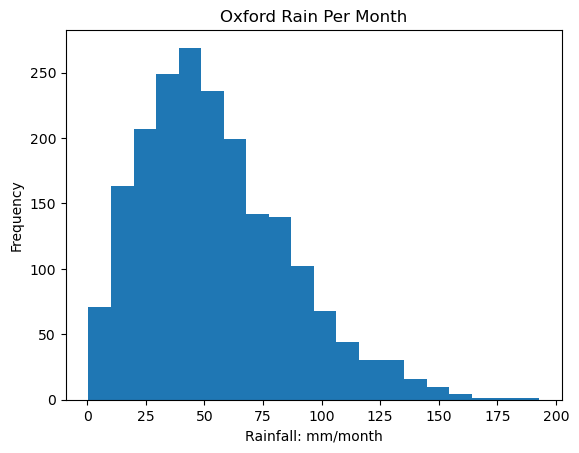

In [18]:
#4.1
#Plot rainfall for each station
plt.hist(oxford['rain'], bins = 20)
plt.title('Oxford Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

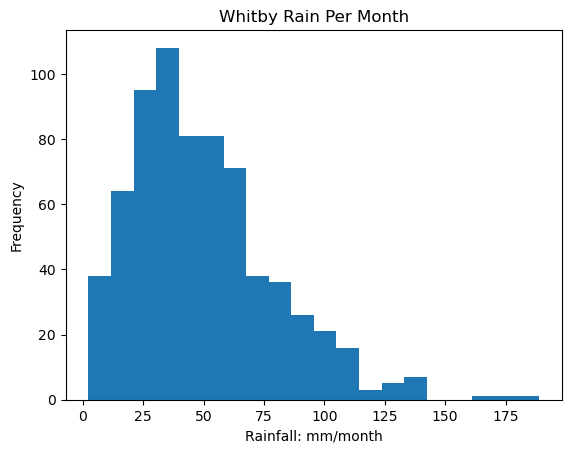

In [19]:
plt.hist(whitby['rain'], bins = 20)
plt.title('Whitby Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

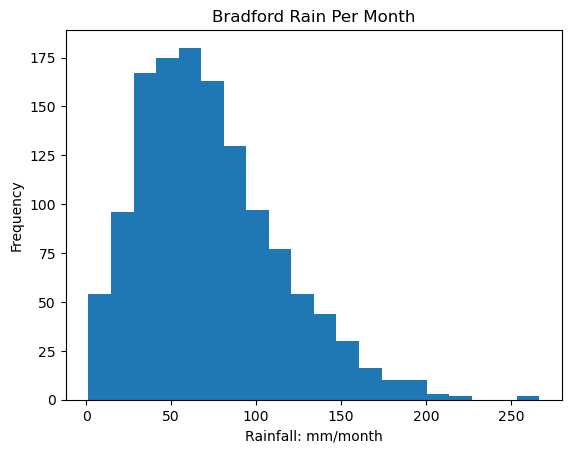

In [20]:
plt.hist(bradford['rain'], bins = 20)
plt.title('Bradford Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

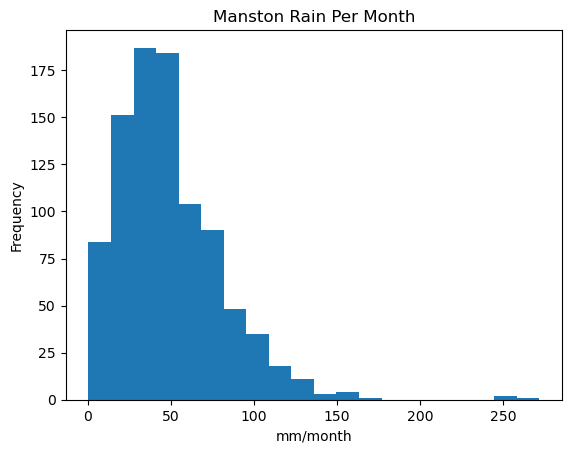

In [21]:
plt.hist(manston['rain'], bins = 20)
plt.title('Manston Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('mm/month')
plt.show()

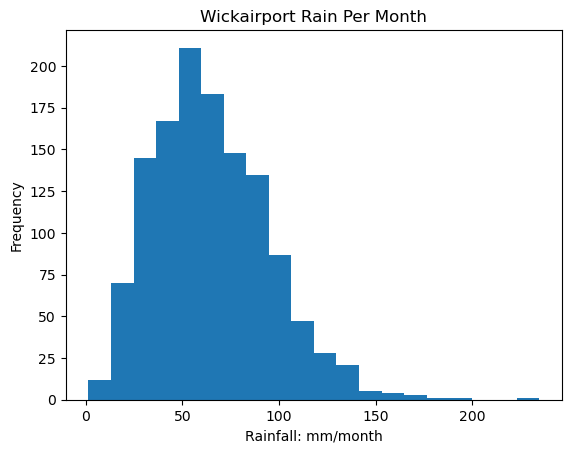

In [22]:
plt.hist(wickairport['rain'], bins = 20)
plt.title('Wickairport Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

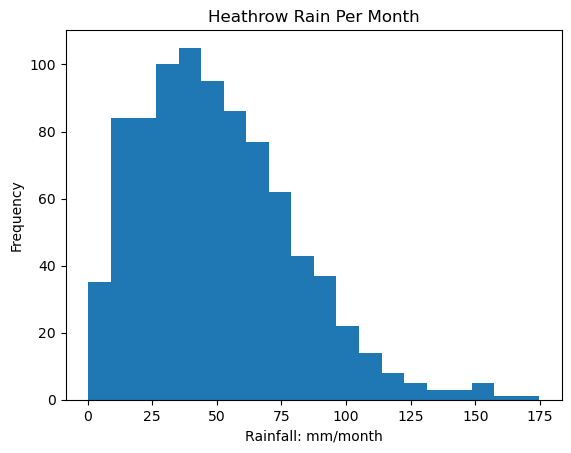

In [23]:
plt.hist(heathrow['rain'], bins = 20)
plt.title('Heathrow Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

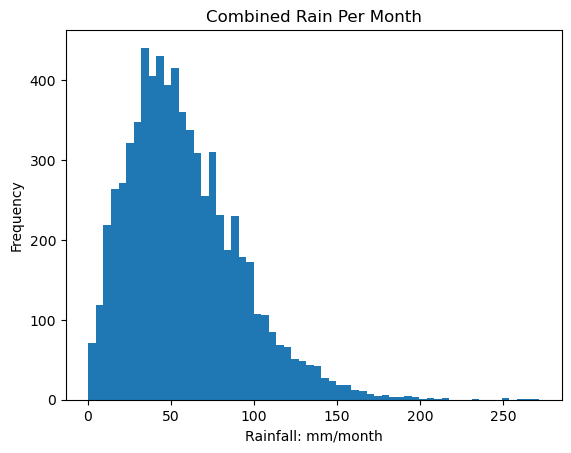

In [24]:
#Make a combined dataframe of all 6 stations
combined = pd.concat([oxford, whitby, bradford, wickairport, manston, heathrow])
plt.hist(combined['rain'], bins = 60)
plt.title('Combined Rain Per Month')
plt.ylabel('Frequency')
plt.xlabel('Rainfall: mm/month')
plt.show()

Text(0.5, 9.444444444444438, 'Maximum Temperature in Degrees C')

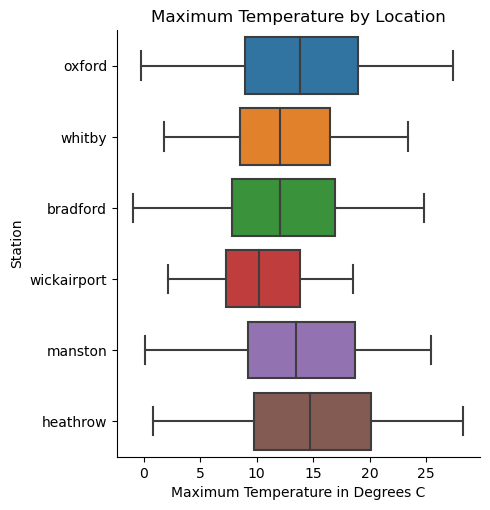

In [25]:
#4.2
#Boxplots of tmax for each station
sns.catplot(data=combined, x="tmax", y="station", kind="box")
plt.title('Maximum Temperature by Location')
plt.ylabel('Station')
plt.xlabel('Maximum Temperature in Degrees C')

Text(0.5, 9.444444444444438, 'Maximum Temperature in Degrees C')

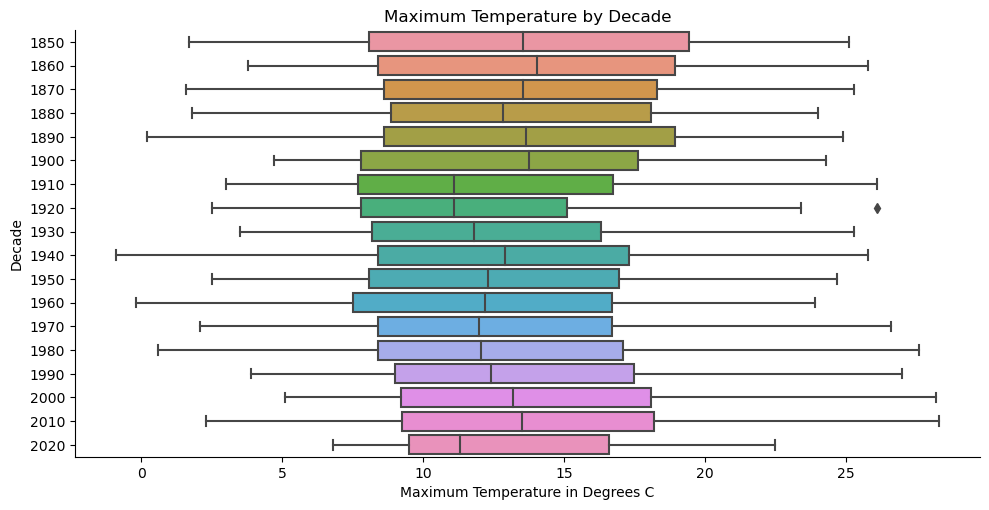

In [26]:
#4.3
#boxplot for each decade with combined dataframe
#note different start days for each station 
combined['decade'] = combined['decade'].astype(str)
sns.catplot(data=combined, x="tmax", y="decade", kind="box", aspect = 2)
plt.title('Maximum Temperature by Decade')
plt.ylabel('Decade')
plt.xlabel('Maximum Temperature in Degrees C')

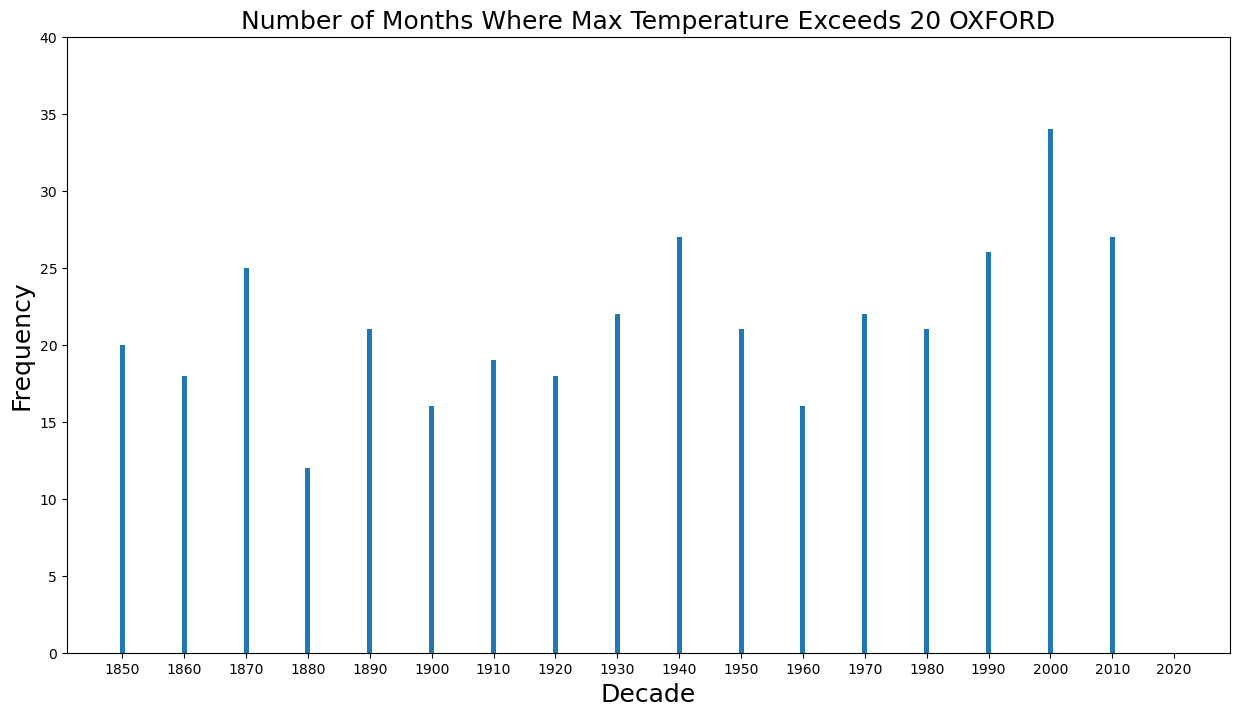

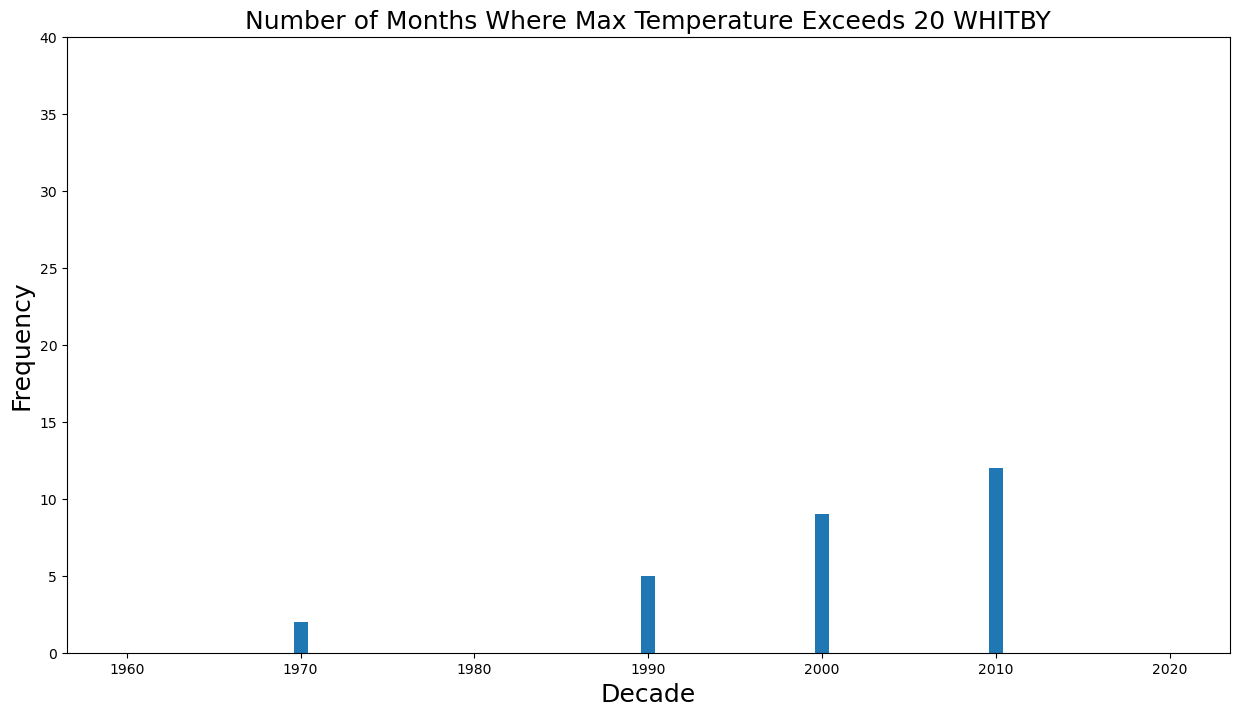

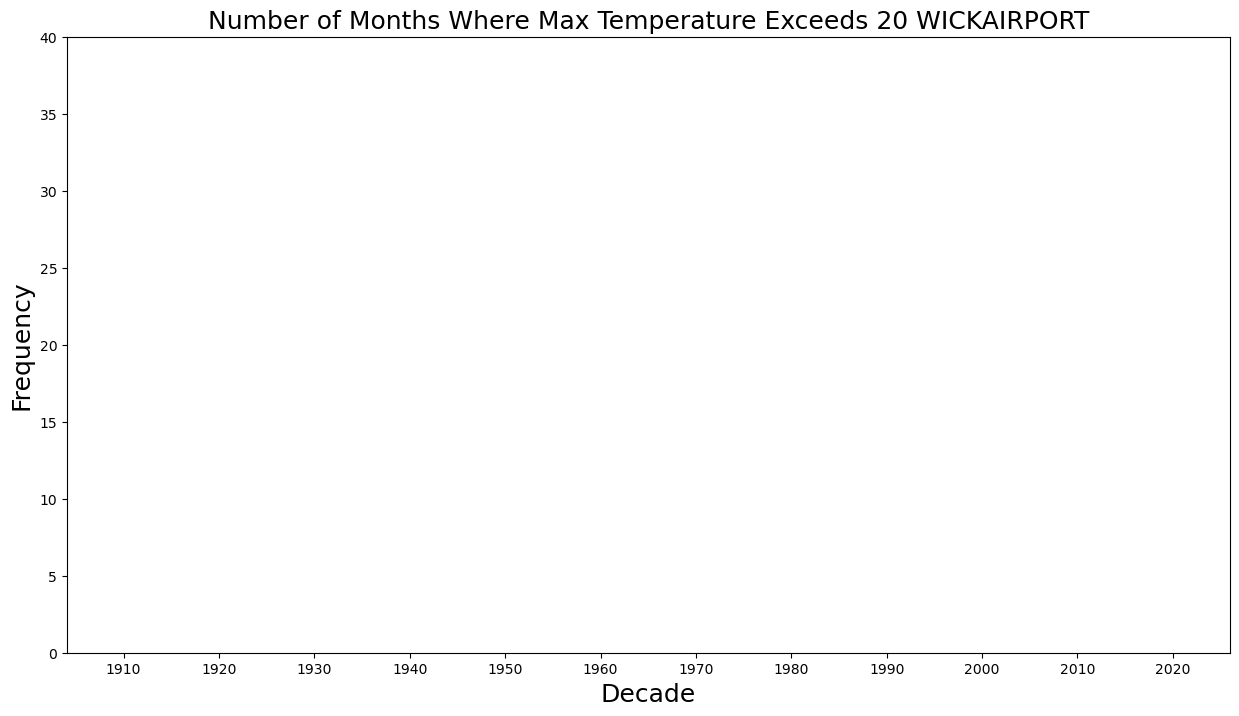

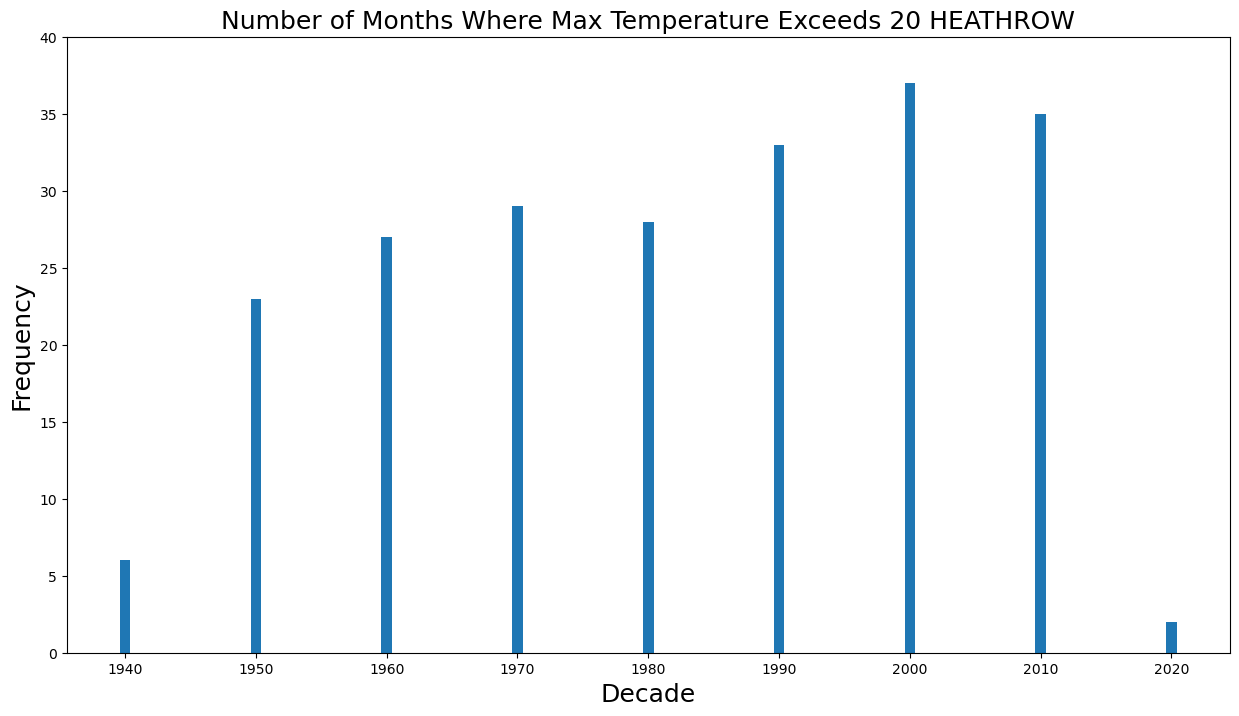

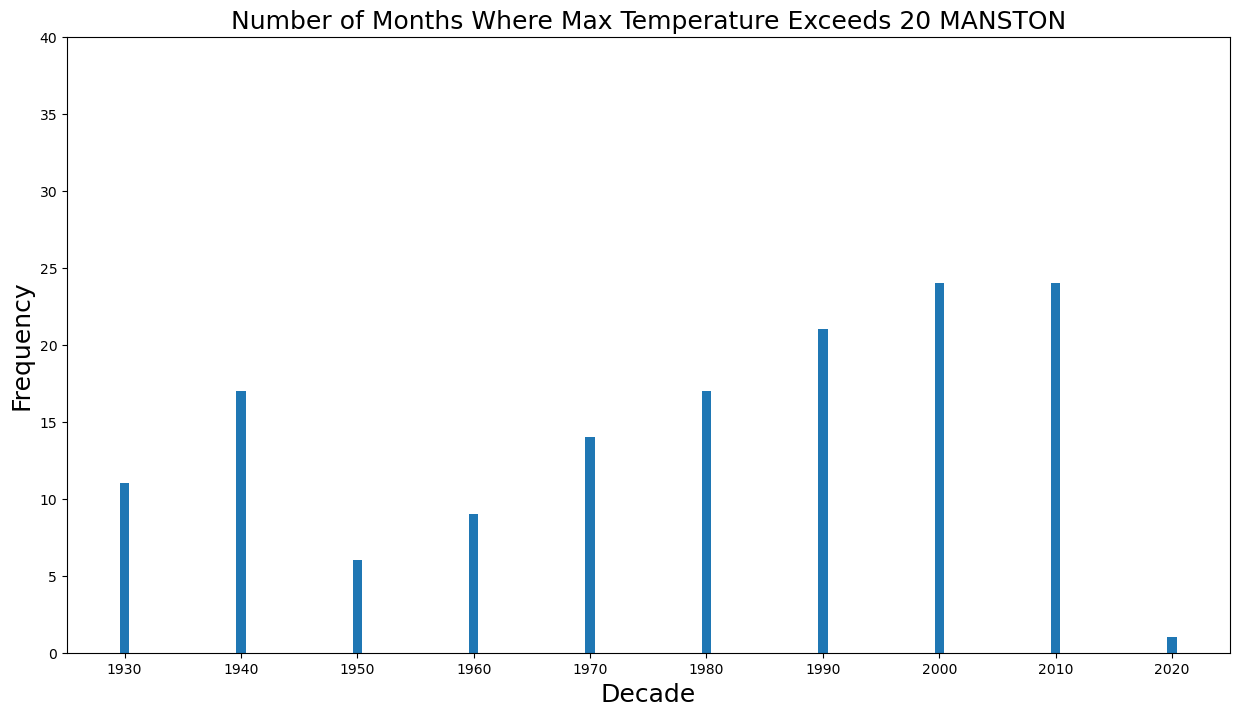

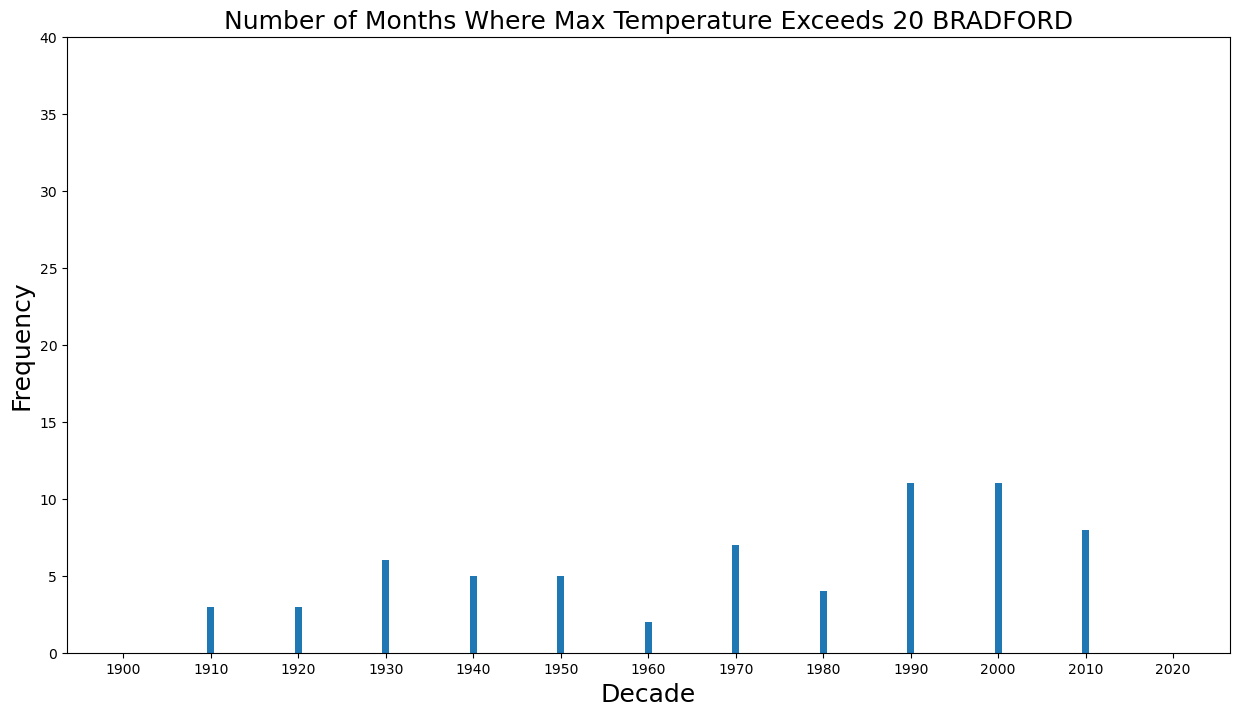

In [27]:
#4.4 
def df_to_bar (station):
    #Create a bar graph that gives count of measurements per decade where tmax >20
    fig, axis1 = plt.subplots(figsize=(15, 8))
    decades = station['decade'].unique()    
    #Find the amount of occurences
    count = station[station['tmax']>20].groupby(by = 'decade').size()
    #Assign 0s to decades where tmax >20 never occurs
    countfull = pd.DataFrame((count), index = decades).rename(columns = {0: 'count'}).fillna(0)
    #Create bar graph
    axis1.bar(decades, countfull['count'])
    axis1.set_ylabel('Frequency', fontsize = 18)
    axis1.set_xlabel('Decade', fontsize = 18)
    axis1.set_title('Number of Months Where Max Temperature Exceeds 20 ' + station['station'][0].upper(), fontsize = 18)
    axis1.set_ylim(ymin=0, ymax=40)
    plt.xticks(decades)
    plt.show()
df_to_bar(oxford)
df_to_bar(whitby)
df_to_bar(wickairport)
df_to_bar(heathrow)
df_to_bar(manston)
df_to_bar(bradford)

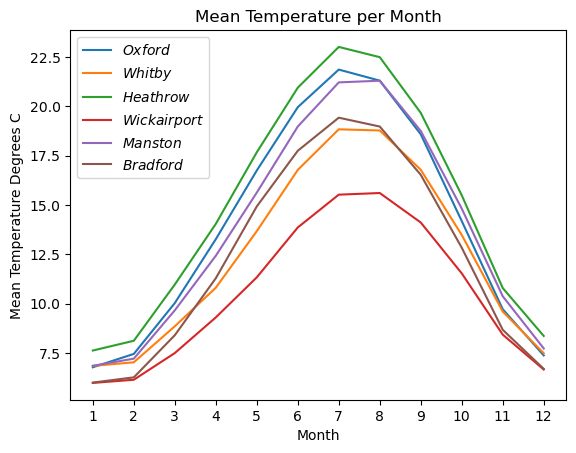

In [28]:
#4.5
months = oxford['month'].unique()   
#Find the mean tmax for each month at every station
mmtox = (oxford.groupby(by = 'month'))['tmax'].mean()
mmtwh = (whitby.groupby(by = 'month'))['tmax'].mean()
mmthe = (heathrow.groupby(by = 'month'))['tmax'].mean()
mmtwi = (wickairport.groupby(by = 'month'))['tmax'].mean()
mmtbr = (bradford.groupby(by = 'month'))['tmax'].mean()
mmtma = (manston.groupby(by = 'month'))['tmax'].mean()
#Create a combined lineplot
fig, ax = plt.subplots()
ax.plot(months, mmtox)
ax.plot(months, mmtwh)
ax.plot(months, mmthe)
ax.plot(months, mmtwi)
ax.plot(months, mmtma)
ax.plot(months, mmtbr)
ax.set_title('Mean Temperature per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Temperature Degrees C')
plt.xticks(months)
ax.legend(['$Oxford$', '$Whitby$','$Heathrow$', '$Wickairport$', '$Manston$', '$Bradford$'],loc='upper left')

# Task 5

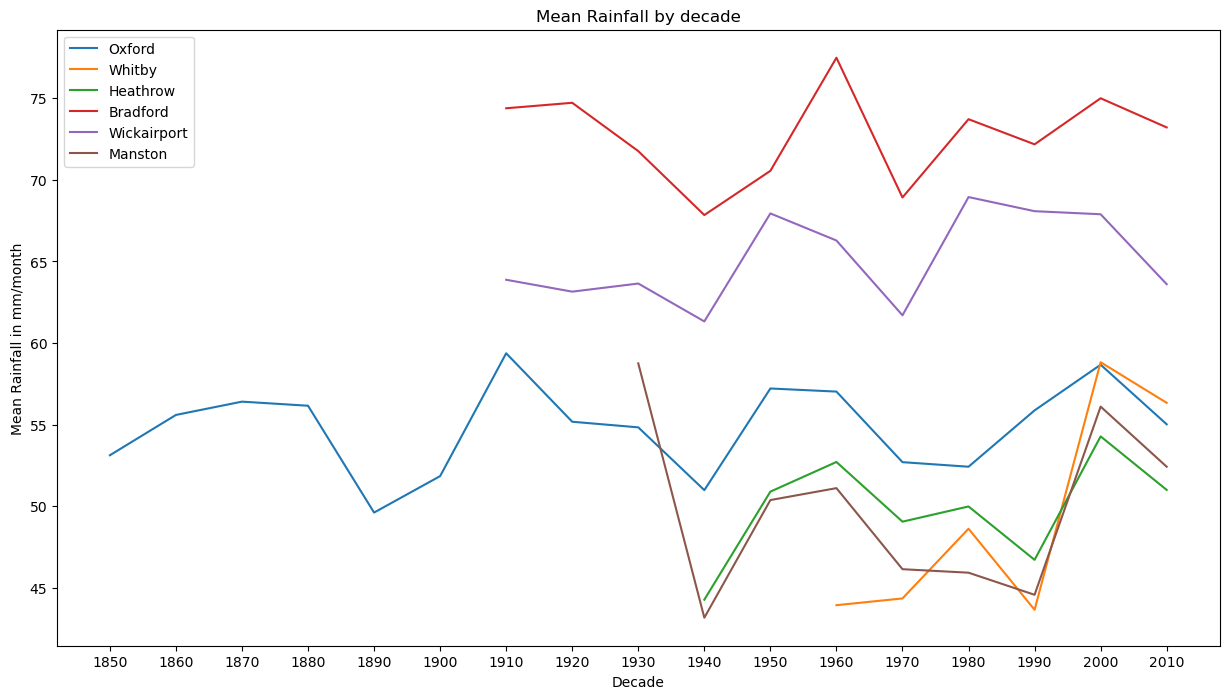

In [29]:
#Figure 5.1
decades = oxford['decade'].unique()
#remove 2020 from decades as it only represents 1/2 of one year
decades = decades[decades != 2020]
#Find mean rain for each decade and add into one dataframe
city_mean_rain = pd.DataFrame({'decade':decades})
for city in citystats:
    mmr = (citystats[city].groupby(by = 'decade'))['rain'].mean()
    mmrc = pd.DataFrame({city:mmr})
    city_mean_rain = city_mean_rain.merge(mmrc, how = 'left', on = 'decade')
fig, axis0 = plt.subplots(figsize=(15, 8))
legend = []
#graph a line plot for each station
for city in cities:
    axis0.plot(decades, city_mean_rain[city])
    legend.append(city)
axis0.set_ylabel('Mean Rainfall in mm/month')
axis0.set_xlabel('Decade')
axis0.set_title('Mean Rainfall by decade')
axis0.legend(legend)
plt.xticks(decades)
plt.show()

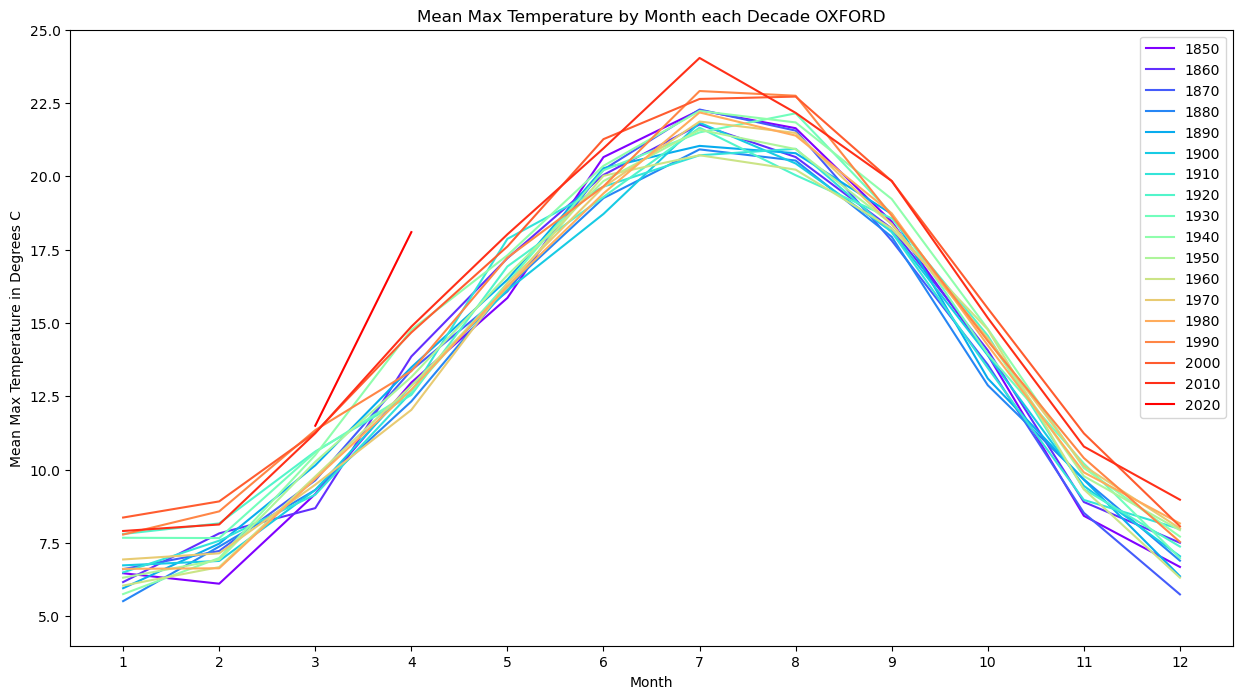

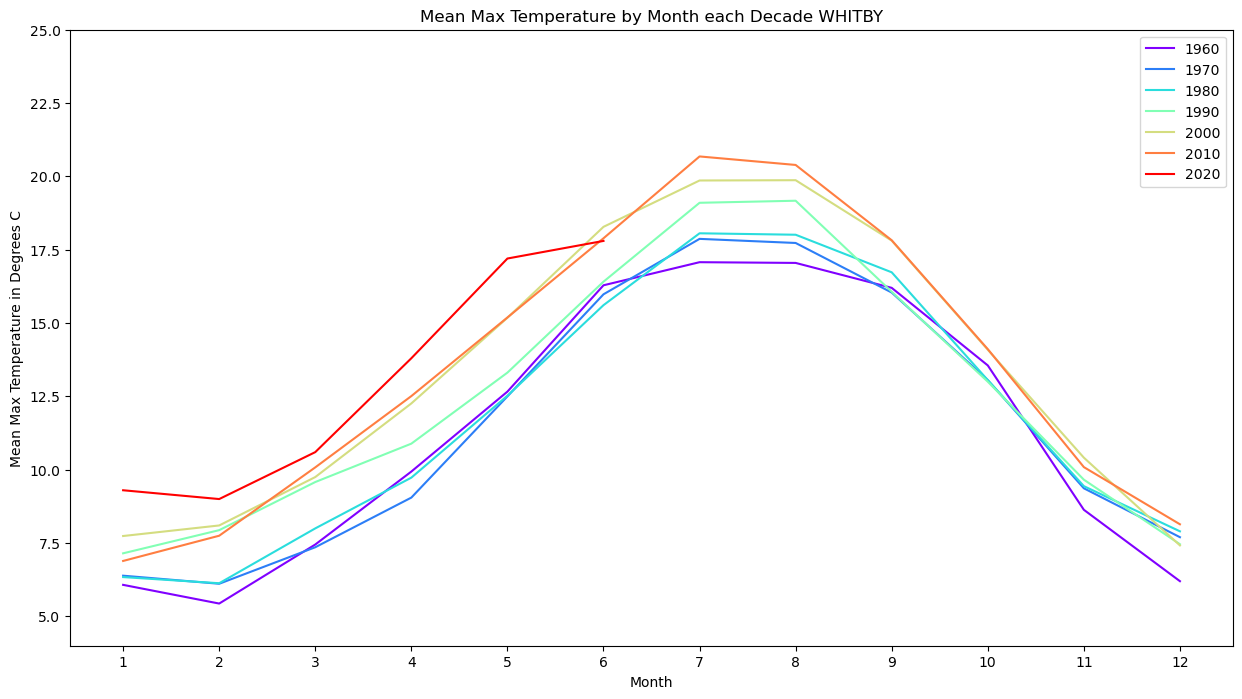

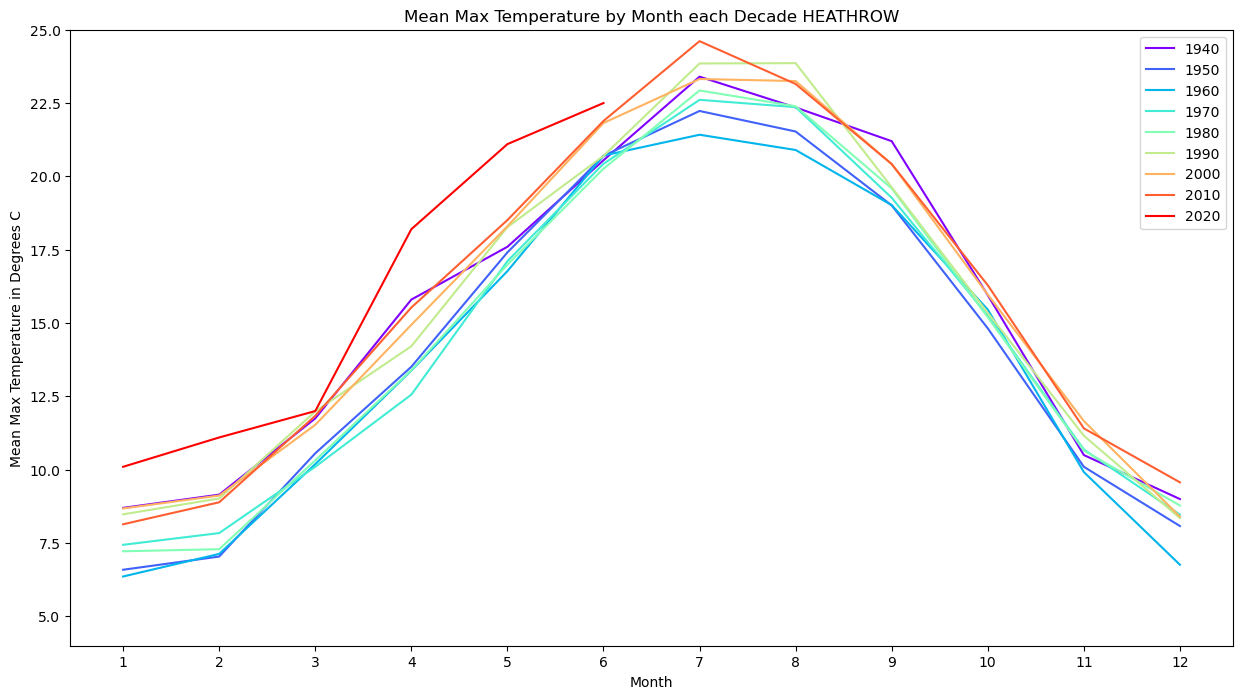

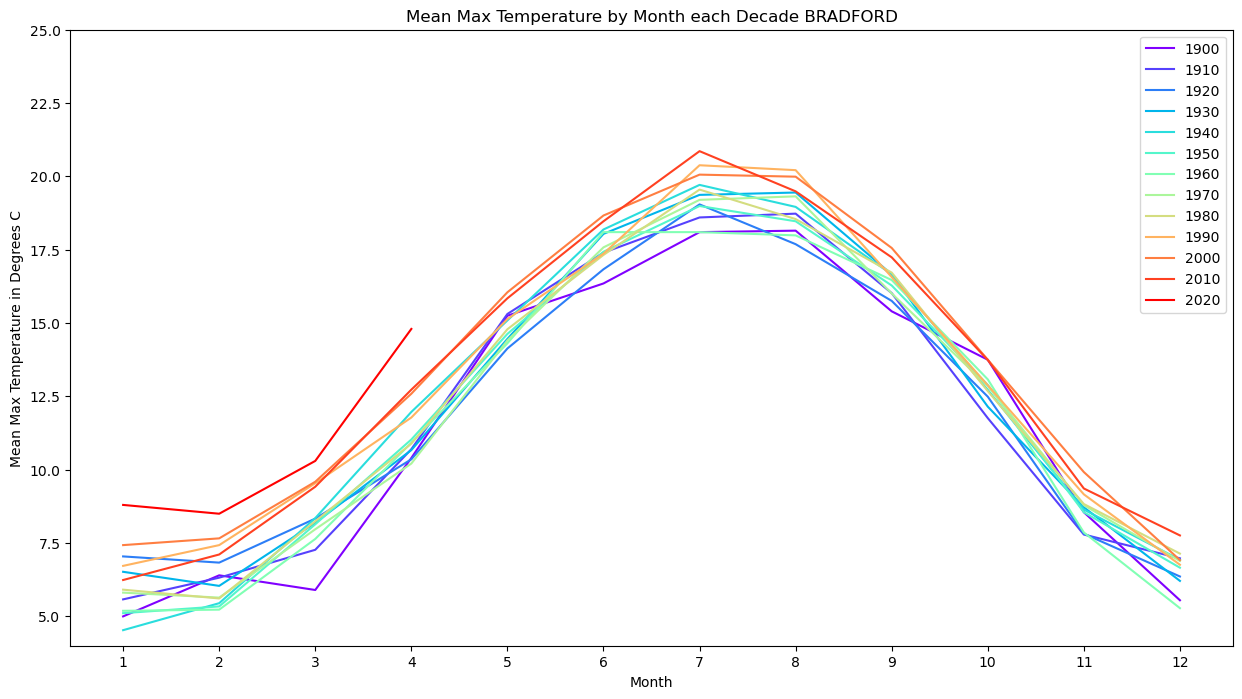

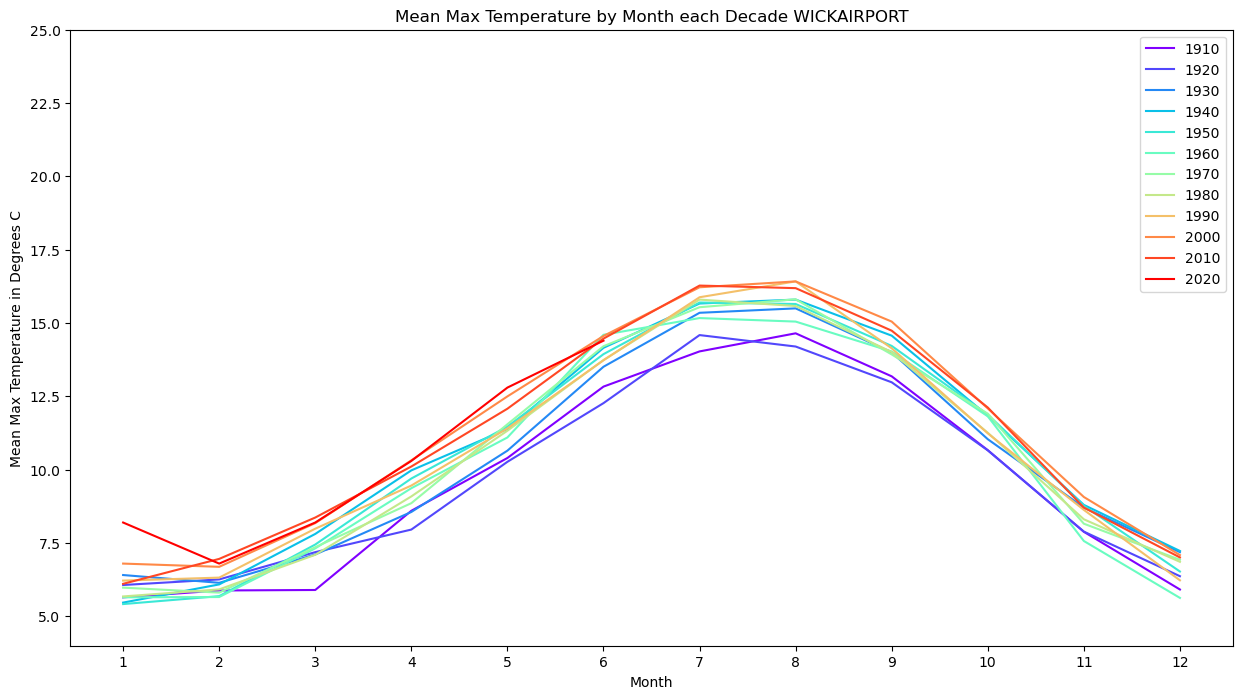

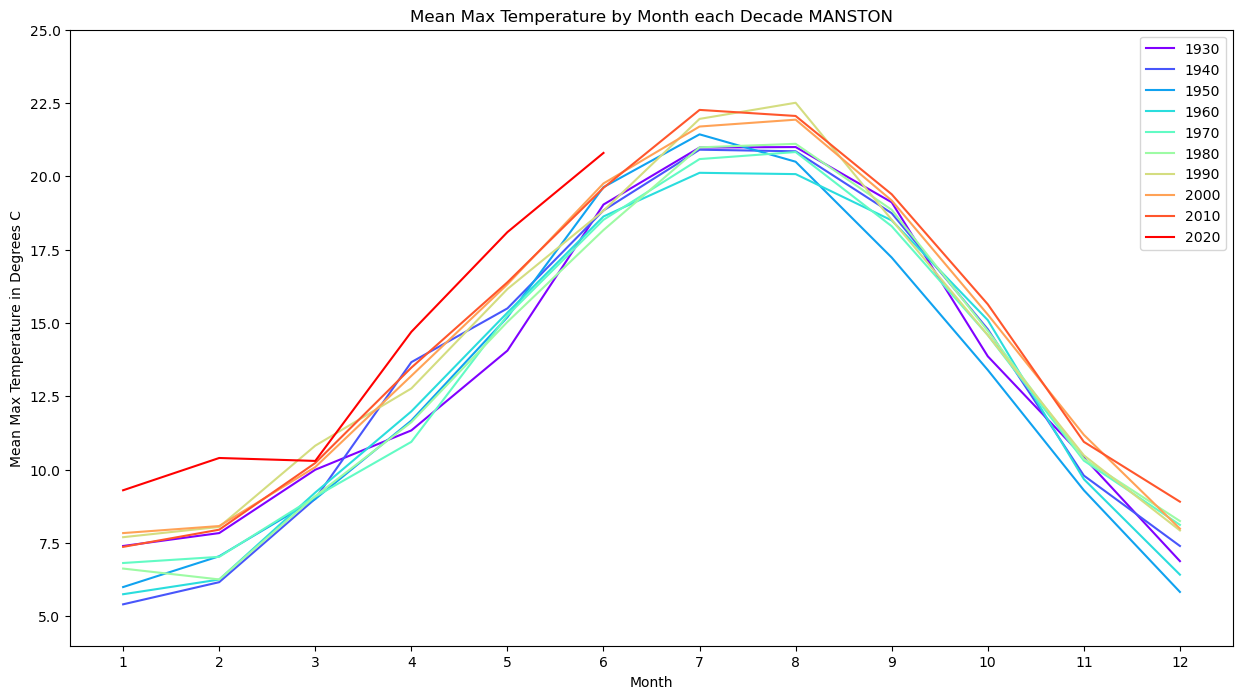

In [30]:
#Figure 5.2
def seasonal_trends_grapher (station):
    months = station['month'].unique()
    months.sort()
    decades = station['decade'].unique()
    decadely_average_rain = pd.DataFrame()
    #Loop through months to fill dataframe with average max temperature each decade by month
    for decade in decades:
        decade_df = station[station['decade'] == decade]
        decade_by_month = decade_df.groupby('month')['tmax'].mean()
        decadely_average_rain[decade] = decade_by_month
    #Make a line plot for each decade with mean tmax for each month
    fig, axis1 = plt.subplots(figsize = (15,8))
    n = len(decades)
    #Use a rainbow color scheme to make graphs easier to read
    colors = plt.cm.rainbow(np.linspace(0, 1, n))
    for i in range(n):
        axis1.plot(months, decadely_average_rain[decades[i]], color = colors[i])
    axis1.set_title('Mean Max Temperature by Month each Decade ' + station['station'][0].upper())
    axis1.set_xlabel('Month')
    axis1.set_ylabel('Mean Max Temperature in Degrees C')
    axis1.legend(decades, loc='upper right')
    axis1.set_ylim(ymin=4, ymax = 25)
    plt.xticks(months)
for city in citystats:
    seasonal_trends_grapher(citystats[city])

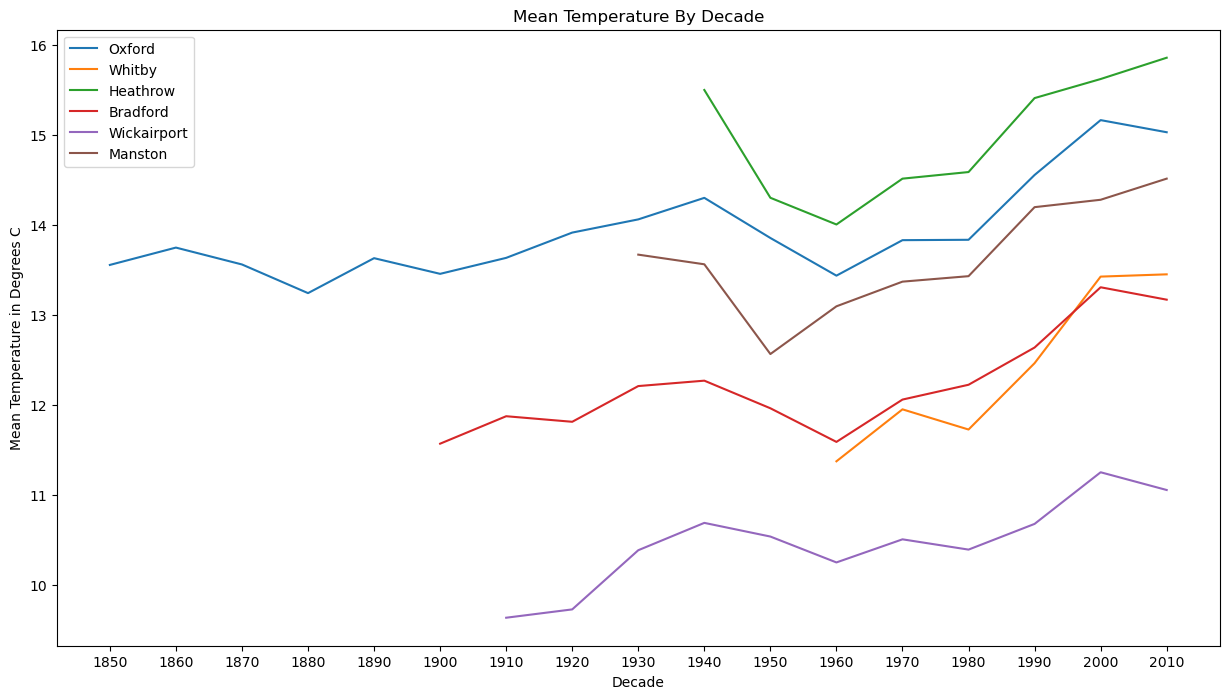

In [31]:
#Figure 5.3
#Find mean tmax at each station for each decade and place into a dataframe
city_mean_temps = pd.DataFrame({'decade':decades})
for city in citystats:
    mmt = (citystats[city].groupby(by = 'decade'))['tmax'].mean()
    mmtc = pd.DataFrame({city:mmt})
    city_mean_temps = city_mean_temps.merge(mmtc, how = 'left', on = 'decade')
#Graph line plots using columns in the dataframe
fig, axis0 = plt.subplots(figsize=(15, 8))
legend = []
for city in cities:
    axis0.plot(decades, city_mean_temps[city])
    legend.append(city)
axis0.set_ylabel('Mean Temperature in Degrees C')
axis0.set_xlabel('Decade')
axis0.set_title('Mean Temperature By Decade')
axis0.legend(legend)
plt.xticks(decades)
plt.show()

Text(0.5, 1.0, 'Mean Rainfall by Year Whitby')

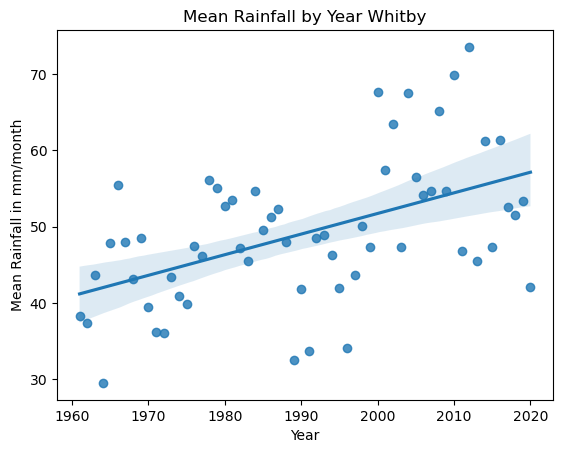

In [32]:
#Figure 5.4
#Create a dataframe for the mean rainfall by year in Whitby
whitby_mrain = pd.DataFrame(whitby.groupby(by = 'year')['rain'].mean())
years = whitby_mrain.index
#Create a linear regression plot of rain over time
sns.regplot(x=years,y='rain', data=whitby_mrain)
plt.ylabel('Mean Rainfall in mm/month')
plt.xlabel('Year')
plt.title('Mean Rainfall by Year Whitby')